## Exploring Tf-IDF

In this notebook you will be exploring the computation of the Tf-IDF feature using a very popular dataset called 20 newsgroups.

The resources you should use to complete this notebook are:
1.  https://en.wikipedia.org/wiki/Tf%E2%80%93idf
2.  http://www.tfidf.com/

the 20 newsgroups by date dataset
Number of posts 11314


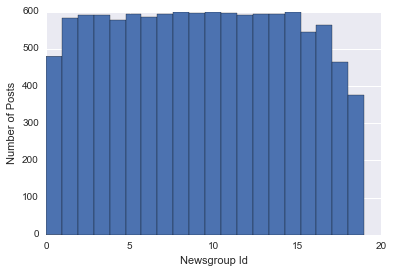

First post!
I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.


In [41]:
%matplotlib inline
from sklearn.datasets import fetch_20newsgroups
from math import log
import seaborn as sns

data = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

post_texts = data.data
news_group_ids = data.target

print data.description

print "Number of posts", len(data.data)
import matplotlib.pyplot as plt
plt.hist(data.target, bins=20)
plt.xlabel('Newsgroup Id')
plt.ylabel('Number of Posts')
plt.show()

print "First post!"
print data.data[0]

In [42]:
def readable(text):
    replace = [',', '.', '\n', '/', '!', '?']
    
    for char in replace:
        text = text.replace(char, ' ')
        
    return text.split()

Next, you will be writing a function to compute the term frequency part of [Tf-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf).  It's up to you how fancy to make this function.  In my simple version, I used split after first removing leading or trailing punctuation (I used the `strip` function) and also converting the words to lower case.

In [44]:
def tf(text, method='freq'):
    """ Returns a dictionary where keys are words that occur in text
        and the value is based on the (method):
        
        freq: word count in text
        norm: ratio of word count to total words in text
        aug: ratio of word count to max word count in text
        log: logarithmically scaled word count in text       
        """
    
    word_freq = {}

    words = readable(text)
    
    for word in words:
        word = word.lower()
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1
    
    if method == 'freq': pass
    
    elif method == 'norm':
        for word, freq in word_freq.iteritems():
            word_freq[word] = freq/float(len(words))
            
    elif method == 'aug':
        max_freq = max(word_freq.values())
        for word, freq in word_freq.iteritems():
            word_freq[word] = freq/float(max_freq)
            
    elif method == 'log':
        for word, freq in word_freq.iteritems():
            word_freq[word] = 1 + math.log(freq)
    
    return word_freq
    

print 'Frequency count: ', tf(data.data[0])['the']
print 'Normalized count: ', tf(data.data[0], 'norm')['the']
print 'Augmented count: ', tf(data.data[0], 'aug')['the']
print 'Log-scale count: ', tf(data.data[0], 'log')['the']

Frequency count:  6
Normalized count:  0.0659340659341
Augmented count:  1.0
Log-scale count:  2.79175946923


Next, you will be writing a function to compute the inverse document frequency part of [Tf-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf).

In [35]:

import operator

def idf(data):
    """ Returns a dictionary where the keys are words and the values are inverse
        document frequencies.  For this function you should use the formula
        idf(w, data) = log(N / |text in data that contain the word w|) """

    word_pres = {}
    num_posts = len(data)
    
    for post in data:
        in_post = []
        words = readable(post)

        for word in words:
            word = word.lower()
            
            #If the word has already been found in this post, don't consider it
            if word in in_post: continue
            in_post.append(word)
        
            if word in word_pres:
                word_pres[word] += 1
            else:
                word_pres[word] = 1

    #Replace simple frequency with inverse doc freq
    for word, freq in word_pres.iteritems():
        word_pres[word] = log(num_posts / float(freq))
    
    return word_pres

idf = idf(data.data)
sorted_idf = sorted(idf.items(), key=operator.itemgetter(1))

print "Lowest IDF (most common)"
for d in sorted_idf[0:10]:
    print d

print ""
print "Highest IDF (least common)"
rev_sorted_idf = sorted(idf.items(), key=operator.itemgetter(1))
for d in reversed(rev_sorted_idf[-10:]):
    print d

0.306177440742 0.179285688888 0.474858953937
Lowest IDF (most common)
(u'the', 0.17928568888758886)
(u'to', 0.29566862657258514)
(u'a', 0.3061774407422126)
(u'and', 0.38339301607014037)
(u'of', 0.3904206347899775)
(u'i', 0.45348881691922943)
(u'in', 0.47485895393655214)
(u'is', 0.48256227305706567)
(u'that', 0.562891431606236)
(u'it', 0.5888301647889916)

Highest IDF (least common)
(u'jawbone', 9.333796175903101)
(u'false-alarms', 9.333796175903101)
(u'm5y$*uv+)m:$hc:@])yh#m8*34cep:u-i"ebfgi', 9.333796175903101)
(u'92-cover', 9.333796175903101)
(u'"push-in"', 9.333796175903101)
(u"\\qev#p'g\\'wqq", 9.333796175903101)
(u'x(1)', 9.333796175903101)
(u'codings', 9.333796175903101)
(u'bigotry)', 9.333796175903101)
(u'(s)wine', 9.333796175903101)


The last step in Tf-IDF is to compute the product of tf and IDF for each document, and then convert the resultant dictionary of Tf-IDF features into a vector.  We'll be discussing this next class.

## Clarifying Questions

Use this space to ask questions regarding the content covered in the reading. These questions should be restricted to helping you better understand the material. For questions that push beyond what is in the reading, use the next answer field. If you don't have a fully formed question, but are generally having a difficult time with a topic, you can indicate that here as well.

## Enrichment Questions

Use this space to ask any questions that go beyond (but are related to) the material presented in this reading. Perhaps there is a particular topic you'd like to see covered in more depth. Perhaps you'd like to know how to use a library in a way that wasn't show in the reading. One way to think about this is what additional topics would you want covered in the next class (or addressed in a followup e-mail to the class). I'm a little fuzzy on what stuff will likely go here, so we'll see how things evolve.

**I found many different weighting formulas for both the tf and idf term, and I'd like to know when to use one over the other, and whether this depends on things like the type of text, the number of samples, etc. Also, are there correlated weighting schemes for tf and idf that need to be used together?**

**And it looks like you can also have different weighting methods for the combined term!**

## Additional Resources / Explorations

If you found any useful resources, or tried some useful exercises that you'd like to report please do so here. Let us know what you did, what you learned, and how others can replicate it.